In [1]:
#Нейро-нечеткие системы
#Лабораторная работа №1

#Задача: выбрать датасет и визуализировать его

In [143]:
%matplotlib inline
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from ipywidgets import Select, SelectMultiple,  Layout, Box, Label
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import seaborn as sns
from windrose import WindroseAxes
from matplotlib import cm
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.collections import PolyCollection
from matplotlib import colors as mcolors
import umap.umap_ as umap

In [144]:
#поиск всех файлов в папке
files = []
for file in os.listdir("."):
    if file.endswith('.csv'):
        files.append(file) 
        
if len(files) != 0:

    fileselect = Select(
        options=files,
        value=files[0],
        description='Select file:',
        disabled=False
    )
fileselect

Select(description='Select file:', options=('Anatase UV.csv', 'avocado.csv', 'cancer_b.csv', 'cancer_m.csv', '…

In [145]:
df = pd.read_csv(fileselect.value, delimiter=",")
df.columns = df.columns.str.strip()
df.fillna(0)
df.describe()

,acousticness,danceability,duration_ms,energy,explicit,instrumentalness,key,liveness,loudness,mode,popularity,speechiness,tempo,valence,year
count,174389.000000,174389.000000,1.743890e+05,174389.000000,174389.000000,174389.000000,174389.000000,174389.000000,174389.000000,174389.000000,174389.000000,174389.000000,174389.000000,174389.000000,174389.000000
mean,0.499228,0.536758,2.328100e+05,0.482721,0.068135,0.197252,5.205305,0.211123,-11.750865,0.702384,25.693381,0.105729,117.006500,0.524533,1977.061764
std,0.379936,0.176025,1.483958e+05,0.272685,0.251978,0.334574,3.518292,0.180493,5.691591,0.457211,21.872740,0.182260,30.254178,0.264477,26.907950
min,0.000000,0.000000,4.937000e+03,0.000000,0.000000,0.000000,0.000000,0.000000,-60.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1920.000000
25%,0.087700,0.414000,1.661330e+05,0.249000,0.000000,0.000000,2.000000,0.099200,-14.908000,0.000000,1.000000,0.035200,93.931000,0.311000,1955.000000
50%,0.517000,0.548000,2.057870e+05,0.465000,0.000000,0.000524,5.000000,0.138000,-10.836000,1.000000,25.000000,0.045500,115.816000,0.536000,1977.000000
75%,0.895000,0.669000,2.657200e+05,0.711000,0.000000,0.252000,8.000000,0.270000,-7.499000,1.000000,42.000000,0.076300,135.011000,0.743000,1999.000000
max,0.996000,0.988000,5.338302e+06,1.000000,1.000000,1.000000,11.000000,1.000000,3.855000,1.000000,100.000000,0.971000,243.507000,1.000000,2021.000000


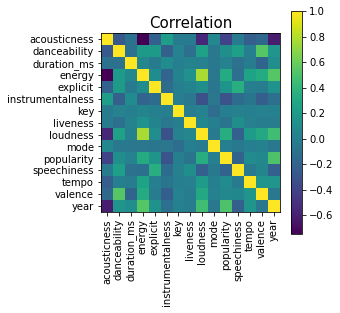

In [147]:
#корреляция 
corr = df.corr()
corrMat = plt.matshow(corr, fignum = 1)
plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
plt.yticks(range(len(corr.columns)), corr.columns)
plt.gca().xaxis.tick_bottom()
plt.colorbar(corrMat)
plt.title("Correlation", fontsize=15)
plt.show()

In [148]:
#оставляем только численные поля
ddf = df.select_dtypes(include=['number'])
select = SelectMultiple(
    options=list(ddf.columns),
    value=[list(ddf.columns)[0]],
    description='Поля розы: ',
    disabled=False
)

In [149]:
form_item_layout = Layout(
    display='flex',
    flex_flow='row',
    justify_content='space-between'
)

form_items = [
    Box([Label(value='Скорость ветров: '), Select(
    options=list(ddf.columns),
    disabled=False
)], layout=form_item_layout),
 Box([Label(value='Направления ветров: '), Select(
    options=list(ddf.columns),
    disabled=False
)], layout=form_item_layout),
]

form = Box(form_items, layout=Layout(
    display='flex',
    flex_flow='column',
    border='solid 2px',
    align_items='stretch',
    width='50%'
))
form

Box(children=(Box(children=(Label(value='Скорость ветров: '), Select(options=('acousticness', 'danceability', …

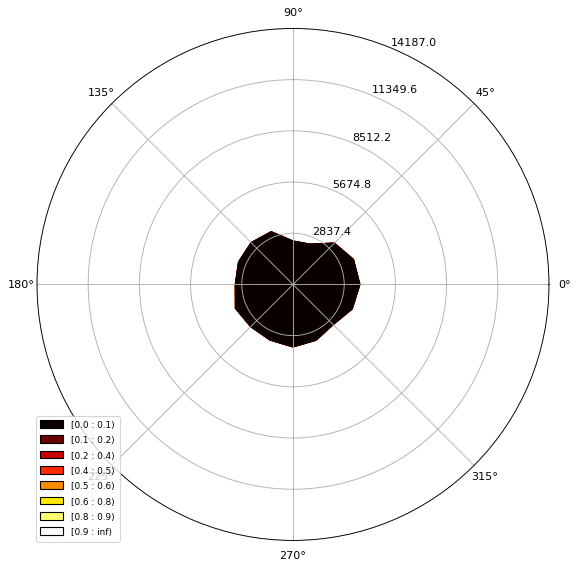

In [151]:
#роза ветров
#energy&mode
left = form.children[0].children[1].value
right = form.children[1].children[1].value
ws = df[left]
wd = df[right]*360

#ws /= ws.max()

ax = WindroseAxes.from_ax()
ax.contourf(wd, ws, bins=np.arange(ws.min(), ws.max(), (ws.max()-ws.min())/8), cmap=cm.hot)
ax.set_legend()

In [152]:
#оставляем только численные поля
ddf = df.select_dtypes(include=['number'])

oneSelect = Select(
        options=list(ddf.columns),
        value=list(ddf.columns)[0],
        description='Выберите поле:',
        disabled=False
    )
oneSelect

Select(description='Выберите поле:', options=('acousticness', 'danceability', 'duration_ms', 'energy', 'explic…

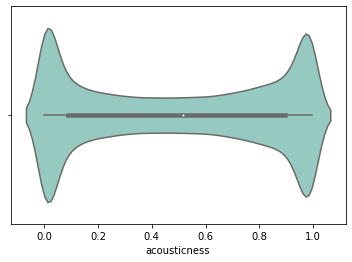

In [153]:
#Виолин
left = oneSelect.value
ax = sns.violinplot(x=left,
                    data=df,
                    scale="width", palette="Set3", dodge=False)

In [155]:
#оставляем только численные поля
ddf = df.select_dtypes(include=['number'])
select = SelectMultiple(
    options=list(ddf.columns),
    value=[list(ddf.columns)[0]],
    description='Поля парного сочетания: ',
    disabled=False
)
select



SelectMultiple(description='Поля парного сочетания: ', index=(0,), options=('acousticness', 'danceability', 'd…

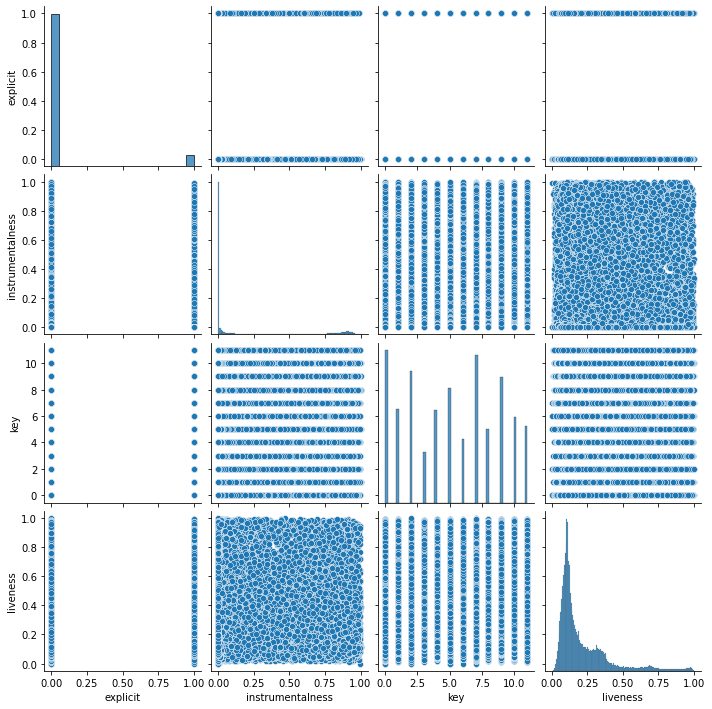

In [156]:
#все возможные пары (тут хорошо видно кластеры)
ddf = df[list(select.value)]
sns.pairplot(ddf)

In [160]:
form_item_layout = Layout(
    display='flex',
    flex_flow='row',
    justify_content='space-between'
)

form_items = [
    Box([Label(value='x: '), Select(
    options=list(ddf.columns),
    disabled=False
)], layout=form_item_layout),
 Box([Label(value='y: '), Select(
    options=list(ddf.columns),
    disabled=False
)], layout=form_item_layout),
    Box([Label(value='z: '), Select(
    options=list(ddf.columns),
    disabled=False
)], layout=form_item_layout),
]

form = Box(form_items, layout=Layout(
    display='flex',
    flex_flow='column',
    border='solid 2px',
    align_items='stretch',
    width='50%'
))

In [161]:
form

Box(children=(Box(children=(Label(value='x: '), Select(options=('explicit', 'instrumentalness', 'key', 'livene…

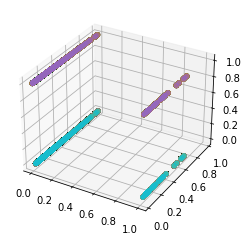

In [166]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
x = repl(ddf[form.children[0].children[1].value])
y =  repl(ddf[form.children[1].children[1].value])
z =  repl(ddf[form.children[2].children[1].value])
for i in range(len(z[:1000])):
    ax.scatter(x[:1000], y[:1000], z[i])

plt.show()

In [168]:
select

SelectMultiple(description='Поля парного сочетания: ', index=(4, 5, 6, 7), options=('acousticness', 'danceabil…

<ipython-input-171-578c28b3c7a4>:16: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


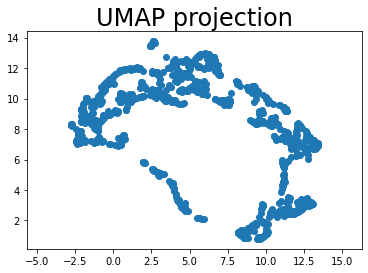

In [171]:
df.fillna(0)
df_data = df[
        list(select.value)
    ].values
df_data = df_data[:1000]
reducer = umap.UMAP()
scaled_data = StandardScaler().fit_transform(df_data)
embedding = reducer.fit_transform(scaled_data)
plt.figure(0)
plt.scatter(
    embedding[:, 0],
        embedding[:, 1])
plt.gca().set_aspect('equal', 'datalim')
plt.title('UMAP projection', fontsize=24)
fig = plt.gcf()
fig.show()